# Pymaceuticals Inc.
---

### Analysis

- In this homework I analyzed mice with tumors over time and the drug regimen they were taking while being observed. 
- The sex of the mice was 51% male and 49% female. This data is shown if figure 3 and 4 below. 
- The mice were observered for over 200 days depending on the drug regimen they were taking. The data can be seen in figure 1 and 2 show that mice taking Capomulin and Ramicane were observed for the most days. 
- The box plot in figure 5 shows the total volume (mm3) of the tumors in mice vs. the drug regimen they were taking.  
    - Infubinol has a potential outlier at a tumor volume of 36. 
    - Capumolin and Ramicane have the best results with median tumor volumes at around 36, and 38. 
- The line graph of mouse l509 shows the tumor volume (mm3) over 40+ days while being treated with Capumolin.  As you can see from the chart the tumor volume decreased significantly over time that time period. 
- The final figure shows that there is a strong correlation between mouse weight and tumor volume. As the mouse weight increase so does the tumor volume. 
 

In [179]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [180]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [181]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
complete_df = pd.merge(study_results,mouse_metadata, how='outer',  on=['Mouse ID', 'Mouse ID'])
complete_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [182]:
# Checking the number of mice.
unique_mice = complete_df['Mouse ID'].unique()
mice_total = len(unique_mice)
mice_total

249

In [183]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_duplicate = complete_df.loc[complete_df.duplicated(['Mouse ID', 'Timepoint'], keep=False), 'Mouse ID'].unique()
find_duplicate

array(['g989'], dtype=object)

In [184]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = complete_df.loc[complete_df['Mouse ID'] == 'g989']
duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [185]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = complete_df.loc[complete_df['Mouse ID'] != 'g989']
cleaned_df.head()
                    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [186]:
# Checking the number of mice in the clean DataFrame.
cleaned_length = len(cleaned_df['Mouse ID'].unique())
cleaned_length

248

## Summary Statistics

In [187]:
cleaned_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [188]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

stats_mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean(numeric_only=False)
stats_median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
stats_variance = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
stats_std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
stats_sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

stats_summary = pd.DataFrame({
    "Mean Tumor Volume": stats_mean,
    "Median Tumor Volume": stats_median,
    "Tumor Volume Variance": stats_variance,
    "Tumor Volume Std. Dev.": stats_std,
    "Tumor Volume Std. Err.": stats_sem
})

stats_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [189]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary = cleaned_df.groupby(
    ['Drug Regimen'])['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem'])

advanced_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0.5, 1.0, 'Mouse Treatment Days')

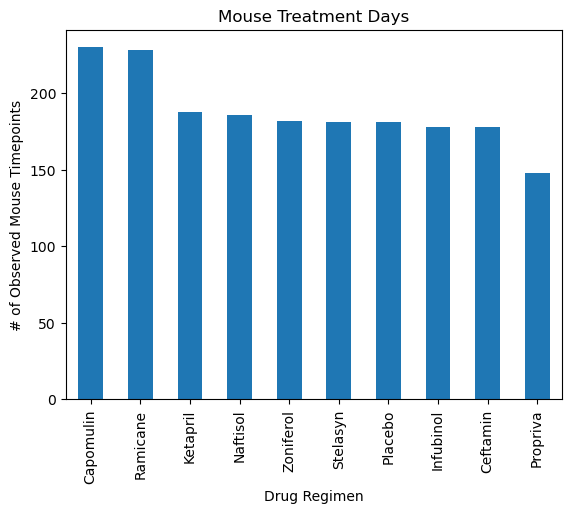

In [190]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_totals = cleaned_df['Drug Regimen'].value_counts()
pandas_graph = mouse_totals.plot(kind='bar')

pandas_graph.set_xlabel('Drug Regimen')
pandas_graph.set_ylabel('# of Observed Mouse Timepoints')
pandas_graph.set_title('Mouse Treatment Days')


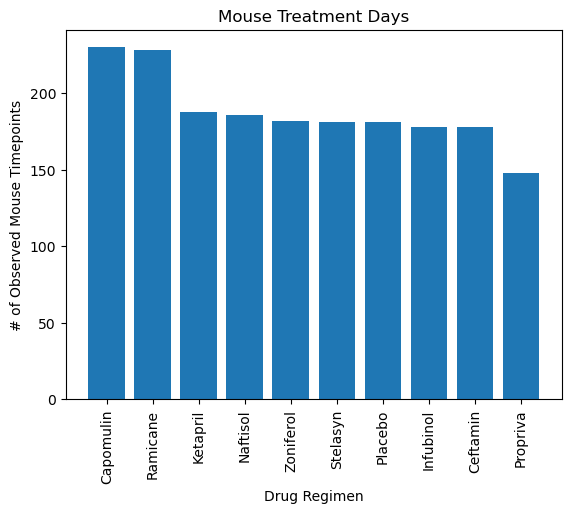

In [191]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

treatment_index = mouse_totals.index
treatment_list = treatment_index.to_list() 
timepoint_values = mouse_totals.values

plt.bar(treatment_list, timepoint_values, align='center')
plt.xticks(rotation='vertical')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Mouse Treatment Days')
plt.show()


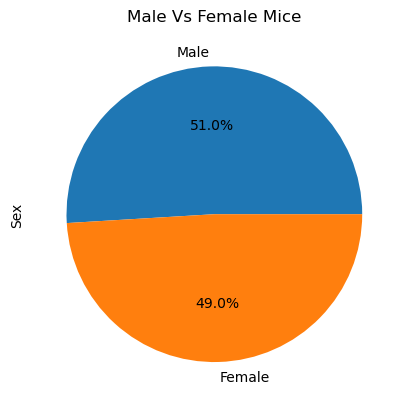

In [192]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_gender = cleaned_df['Sex'].value_counts()
pandas_pie = mice_gender.plot.pie(autopct='%1.1f%%')
pandas_pie.set_title('Male Vs Female Mice')
pandas_pie.set_ylabel('Sex')
pandas_pie.set_aspect('equal')


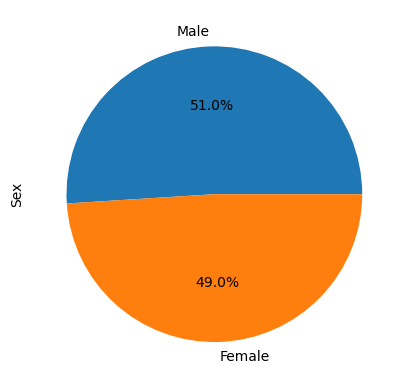

In [193]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_label = ['Male', 'Female']
gender_percent = [51, 49]

plt.pie(gender_percent, labels=mice_label, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [194]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume_df = cleaned_df.groupby(['Mouse ID', 'Drug Regimen'])
greatest_timepoint = tumor_volume_df['Timepoint'].max()

# Put treatments into a list for for loop (and later for plot labels)

regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_tumor_df = cleaned_df[cleaned_df['Drug Regimen'].isin(regimen_list)]

tumor_merged_df = pd.merge(filtered_tumor_df, greatest_timepoint, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='right')
tumor_volume_final_df = tumor_merged_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
tumor_volume_final_df


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a262,Placebo,NaN
3,a275,Ceftamin,62.999356
4,a366,Stelasyn,NaN
...,...,...,...
243,z435,Propriva,NaN
244,z578,Ramicane,30.638696
245,z581,Infubinol,62.754451
246,z795,Naftisol,NaN


In [203]:
# create empy list to store volume data
tumor_vol_list = []

for regimen in regimen_list:
     # Locate the rows which contain mice on each drug and get the tumor volumes
    
    regimen_data = tumor_volume_final_df[tumor_volume_final_df['Drug Regimen'] == regimen]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    tumor_vol = regimen_data['Tumor Volume (mm3)']
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    upper_b = upperq + (1.5 * iqr)
    lower_b = lowerq - (1.5 * iqr) 
    
    # Determine outliers using upper and lower bounds
    
    outliers = tumor_vol[(tumor_vol < lower_b) | (tumor_vol > upper_b)]
    # Create key value pair out of regimen list and volume data
    tumor_vol_list.append(tumor_vol.tolist())
    print(f'Drug Regimen: {regimen}')
    print(f'Potential Outliers: {outliers}')


Drug Regimen: Capomulin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Regimen: Ramicane
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug Regimen: Infubinol
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen: Ceftamin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


[]

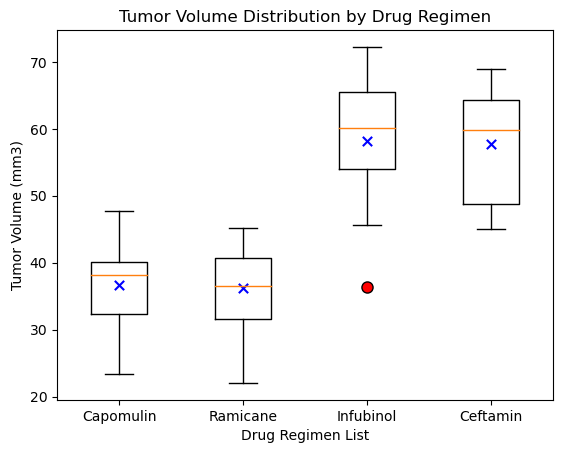

In [219]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_box = plt.boxplot(tumor_vol_list)
plt.xticks(range(1, len(regimen_list) + 1), regimen_list)

# Color in outliers dot to make for visible.

for outlier in tumor_box['fliers']:
    outlier.set(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black')

# Show mean values by placing x mark.

for i, regimen in enumerate(tumor_vol_list):
    mean_val = sum(regimen) / len(regimen)
    
    plt.scatter(i + 1, mean_val, marker='x', color='blue', s=45)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen List')
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.plot()



## Line and Scatter Plots 

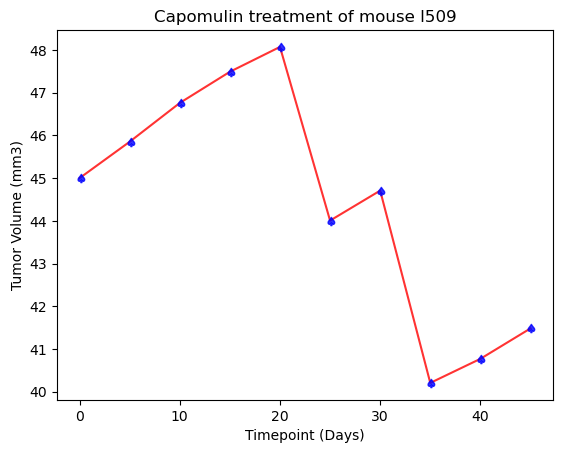

In [197]:
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
selected_mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 'l509']
spade = mpl.markers.MarkerStyle(marker=r'$\spadesuit$')
plt.plot(
    selected_mouse_df['Timepoint'], 
    selected_mouse_df['Tumor Volume (mm3)'],
    color='r', linestyle='-', alpha=0.8, marker=spade,
    markerfacecolor='b', markeredgecolor='b')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (Days)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

In [20]:
capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


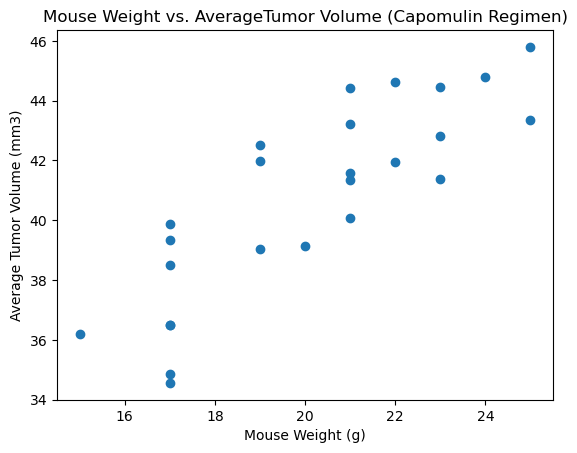

In [21]:
tumor_vol_avg = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, tumor_vol_avg)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. AverageTumor Volume (Capomulin Regimen)')
plt.show()

## Correlation and Regression

r value: 0.7088568047708723


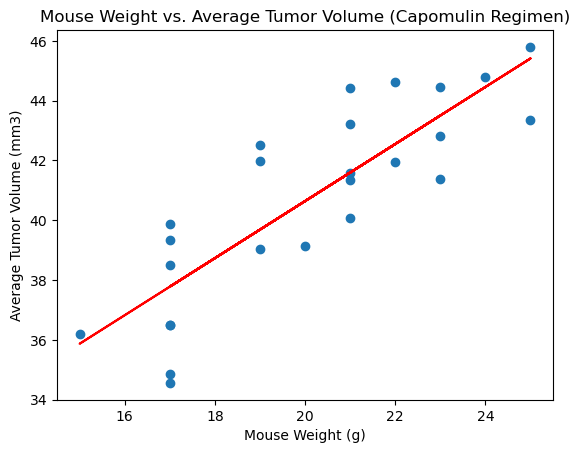

In [174]:
correlation_coefficient = np.corrcoef(mouse_weight, tumor_vol_avg)[0,1]
plt.scatter(mouse_weight, tumor_vol_avg)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, tumor_vol_avg)
regression_line = slope * mouse_weight + intercept

plt.plot(mouse_weight, regression_line, color='r')
print(f'r value: {r_value**2}')
plt.show()